In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

## Load the data

In [52]:
from sklearn.datasets import load_iris

iris = load_iris()

In [53]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Feature selection: PCA

### Standardization

In [54]:
X = df_iris.drop('target', axis=1)
y = df_iris['target']

In [55]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

### PCA

In [56]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

In [57]:
X_pca = pca.fit_transform(X_scaled)

## KMeans Clustering

In [58]:
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters=3) # we didn't pass y_train because Kmeans is unsupervised ML algorithm

In [59]:
Kmeans.fit(X_pca)

C:\Users\zakar\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [60]:
y_pred = Kmeans.predict(X_pca)

In [61]:
df_iris['pred'] = y_pred

In [62]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,pred
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


## Confusion matrix

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y, y_pred)

In [64]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [65]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = iris.target_names)

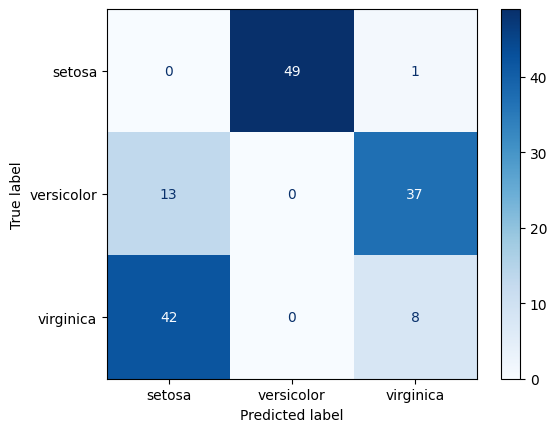

In [66]:
import matplotlib.pyplot as plt

cm_display.plot(cmap=plt.cm.Blues)
plt.show()